In [ ]:
import cv2

In [ ]:
#pip install opencv-python

In [ ]:
#image path 
test_image_path = "/content/drive/MyDrive/Colab Notebooks/test_image.png"

In [ ]:
#read image
test_image = cv2.imread(test_image_path)

In [ ]:
# Extracting the height and width of an image
h, w = test_image.shape[:2]
# Displaying the height and width
print("Height = {},  Width = {}".format(h, w))

Height = 1945,  Width = 1945


In [ ]:
# Extracting RGB values. 
# Here we have randomly chosen a pixel
# by passing in 100, 100 for height and width.
(B, G, R) = test_image[100, 100]
  
# Displaying the pixel values
print("R = {}, G = {}, B = {}".format(R, G, B))

R = 13, G = 29, B = 42


In [ ]:
# We will calculate the region of interest 
# by slicing the pixels of the image
roi = test_image[100 : 500, 200 : 700]

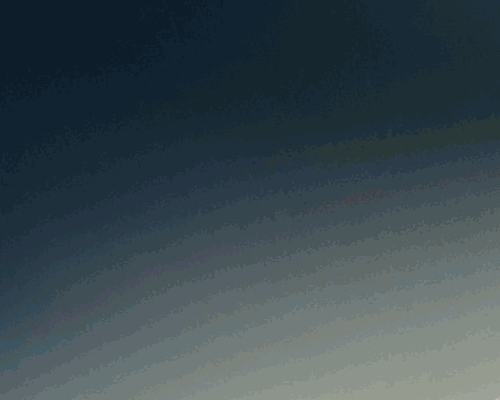

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(roi)
#cv2.imshow("window name", image) .py

In [ ]:
test_image_resize = cv2.resize(test_image, (720, 600), interpolation = cv2.INTER_LINEAR)
test_image_resize.shape

(600, 720, 3)

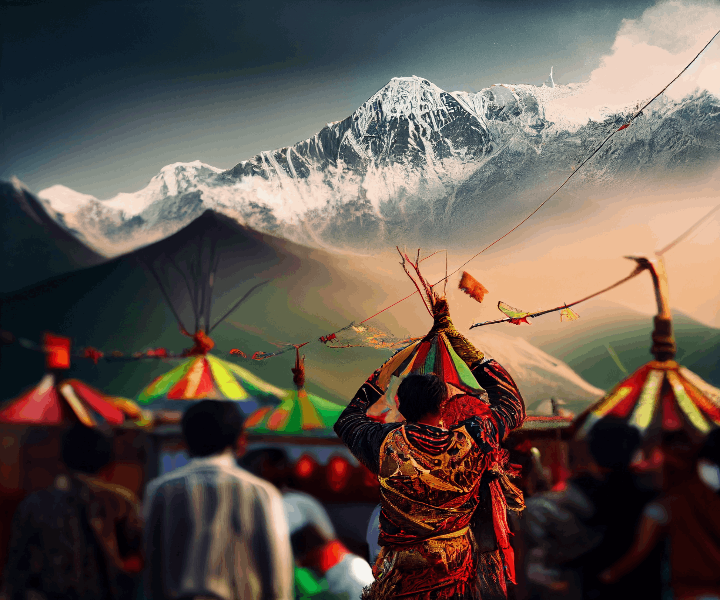

In [ ]:
cv2_imshow(test_image_resize)

In [ ]:
# Calculating the ratio
ratio = 600 / w
  
# Creating a tuple containing width and height
dim = (800, int(h * ratio))
  
# Resizing the image
resize_aspect = cv2.resize(test_image_resize, dim)

resize_aspect.shape

(600, 800, 3)

In [56]:
# Calculating the center of the image
center = (w // 2, h // 2)
  
# Generating a rotation matrix
matrix = cv2.getRotationMatrix2D(center, -45, 1.0) 
  
# Performing the affine transformation
rotated = cv2.warpAffine(test_image_resize, matrix, (w, h))

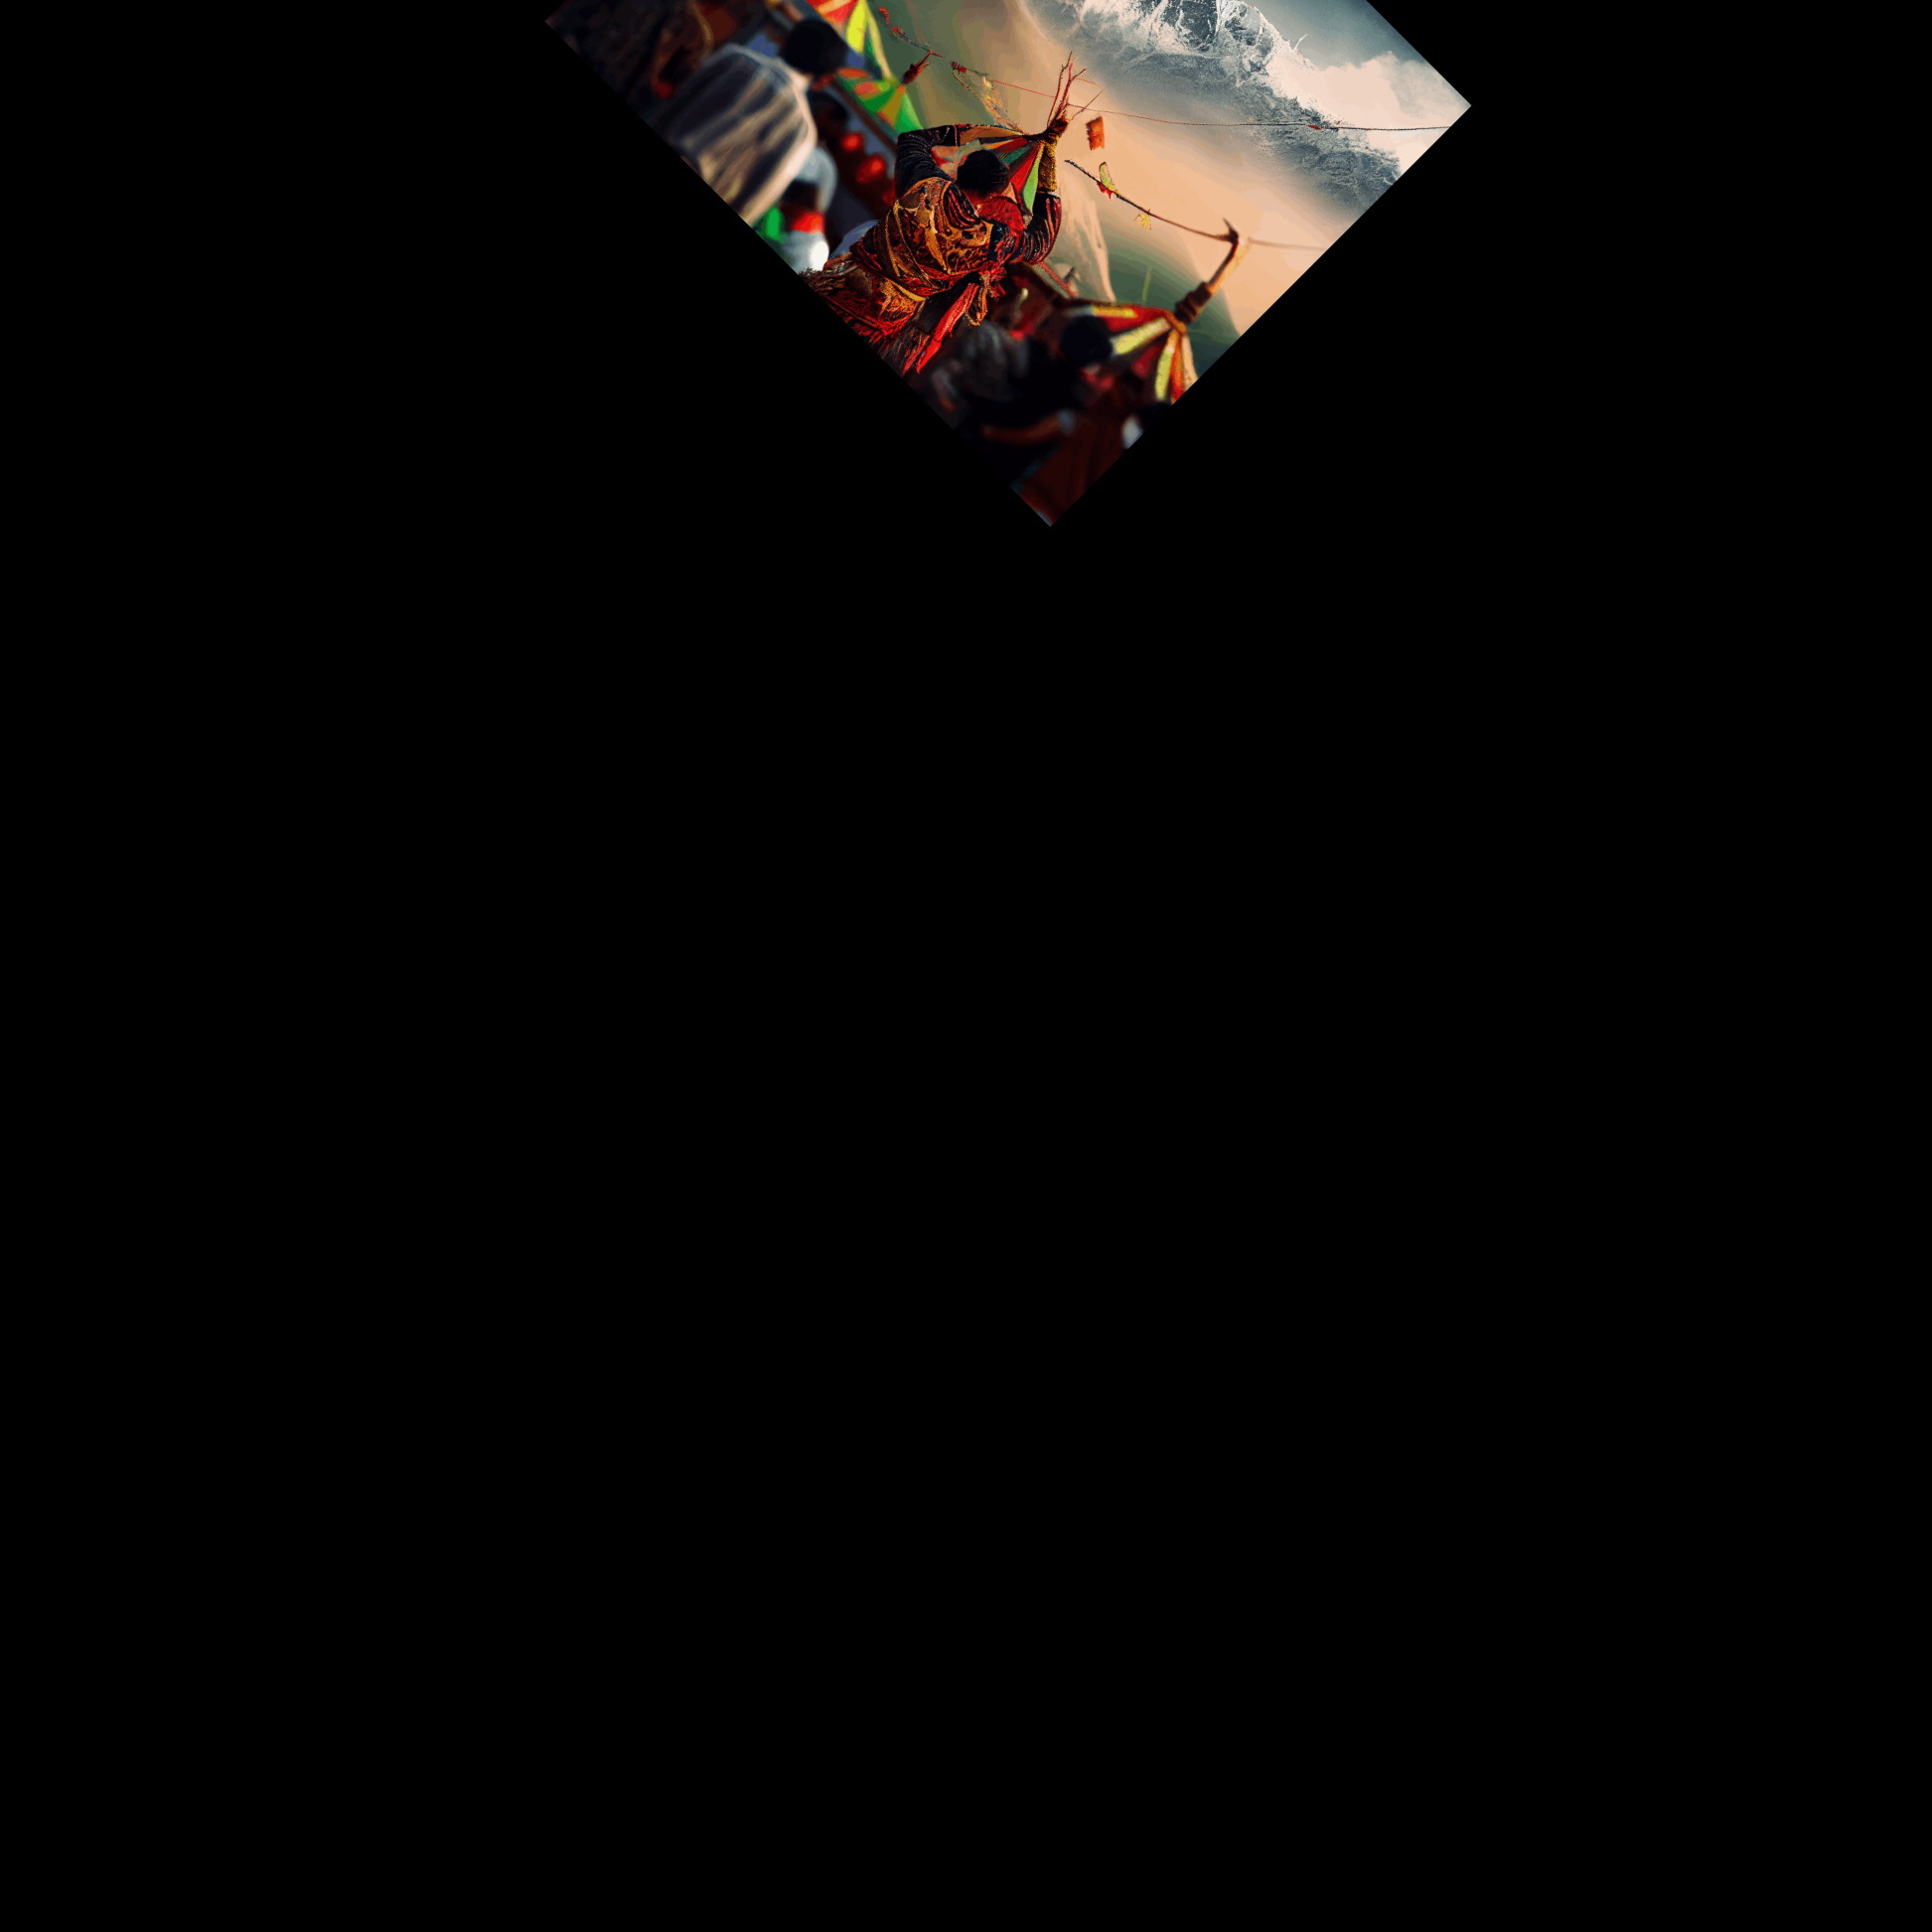

In [57]:
cv2_imshow(rotated)

In [ ]:
test_image_resize.shape

(600, 720, 3)

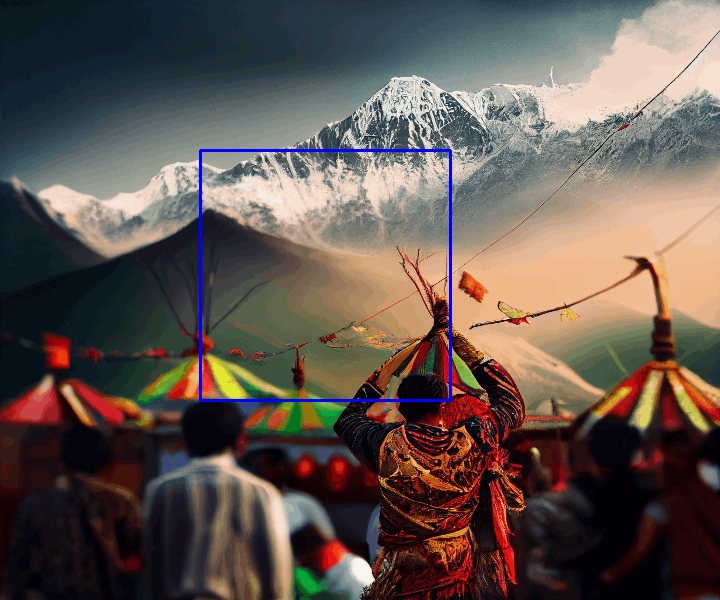

In [ ]:
# We are copying the original image, 
# as it is an in-place operation.
test_copy = test_image_resize.copy()
  
# Using the rectangle() function to create a rectangle.
rectangle_img = cv2.rectangle(test_copy, (200, 150), (450, 400), (255, 0, 0), 2)

cv2_imshow(rectangle_img)

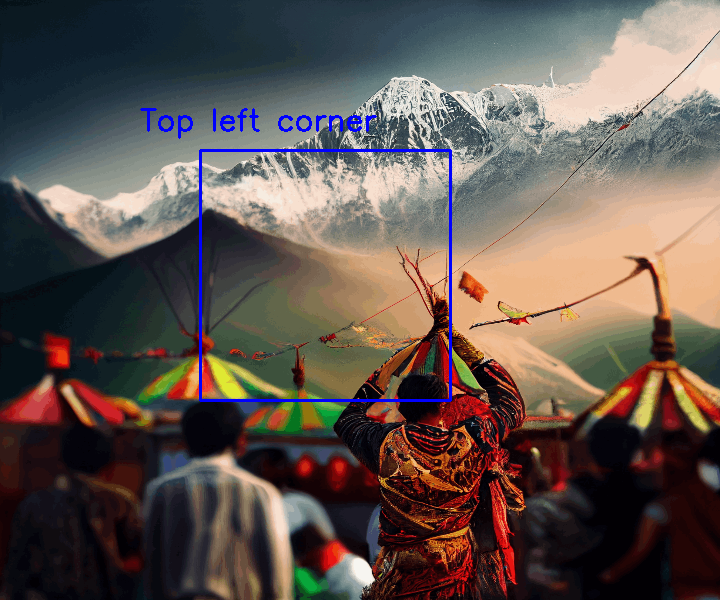

In [ ]:
rec_copy = rectangle_img.copy()

# Adding the text using putText() function
text_img = cv2.putText(rec_copy, 'Top left corner', (140,130), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

cv2_imshow(text_img)

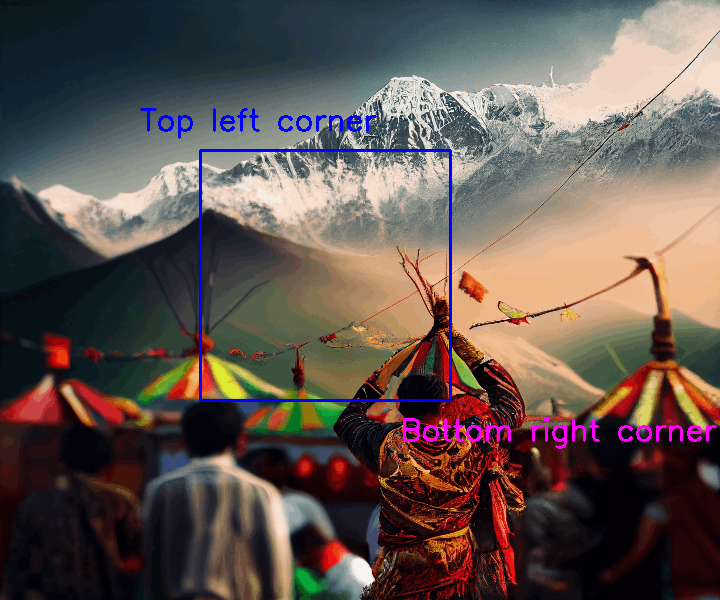

In [ ]:
text_copy_4 = text_img.copy()

# Adding the text using putText() function
text_image = cv2.putText(text_copy_4, 'Bottom right corner', (400,440), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)

cv2_imshow(text_image)

In [ ]:
import numpy as np

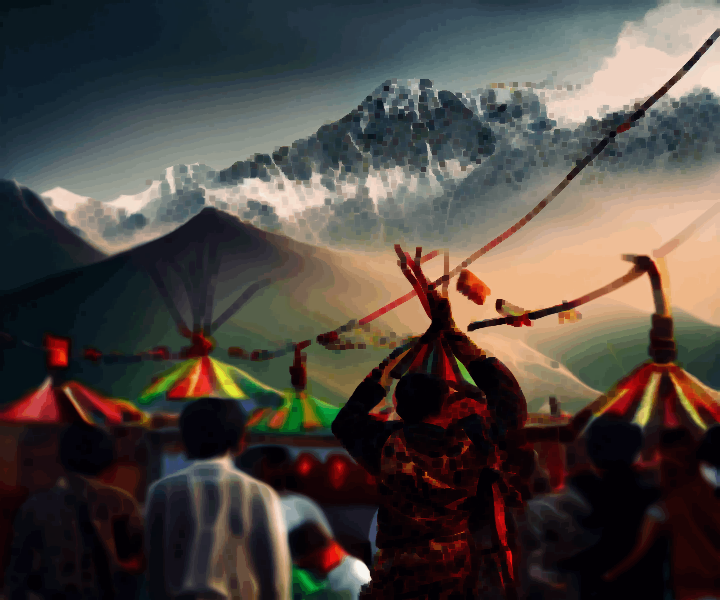

In [ ]:
#Eroding
kernel = np.ones((5, 5), np.uint8)
  
# Using cv2.erode() method 
image = cv2.erode(test_image_resize, kernel) 
  
# Displaying the image 
cv2_imshow(image)

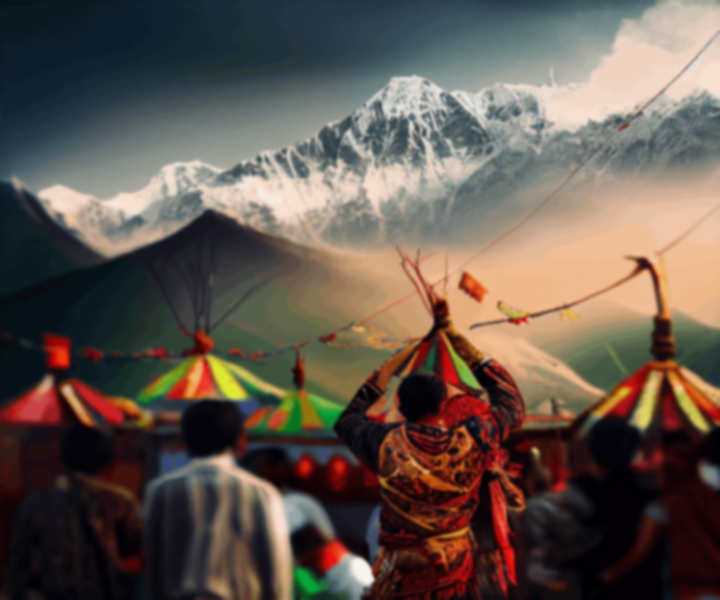

In [ ]:
#Gaussian Blur
Gaussian = cv2.GaussianBlur(test_image_resize, (7, 7), 0)
cv2_imshow(Gaussian)

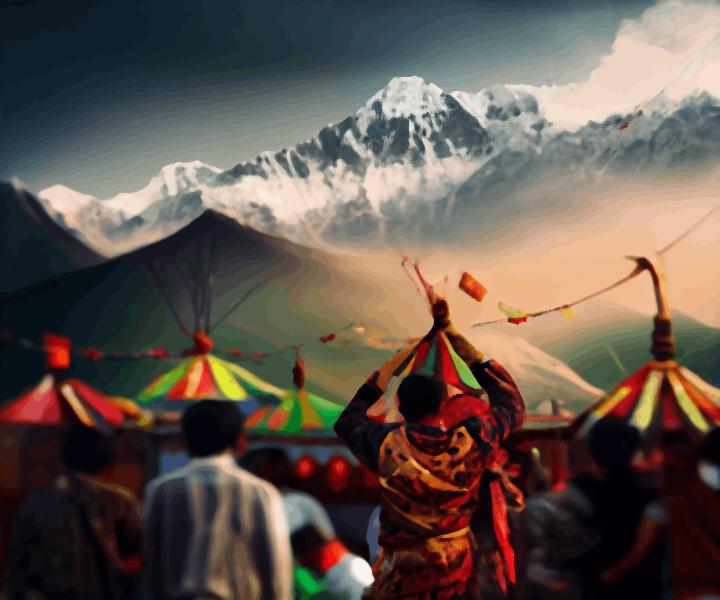

In [ ]:
# Median Blur
median = cv2.medianBlur(test_image_resize, 5)
cv2_imshow(median)

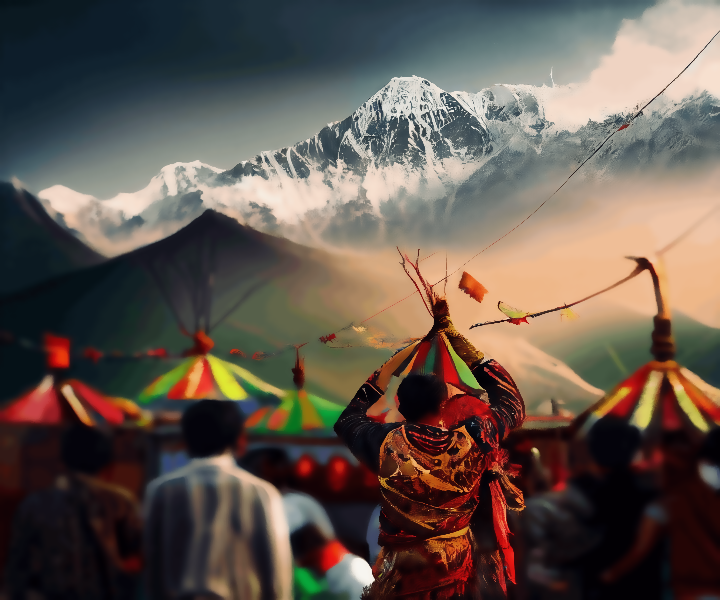

In [ ]:
# Bilateral Blur
bilateral = cv2.bilateralFilter(test_image_resize, 9, 75, 75)
cv2_imshow(bilateral)

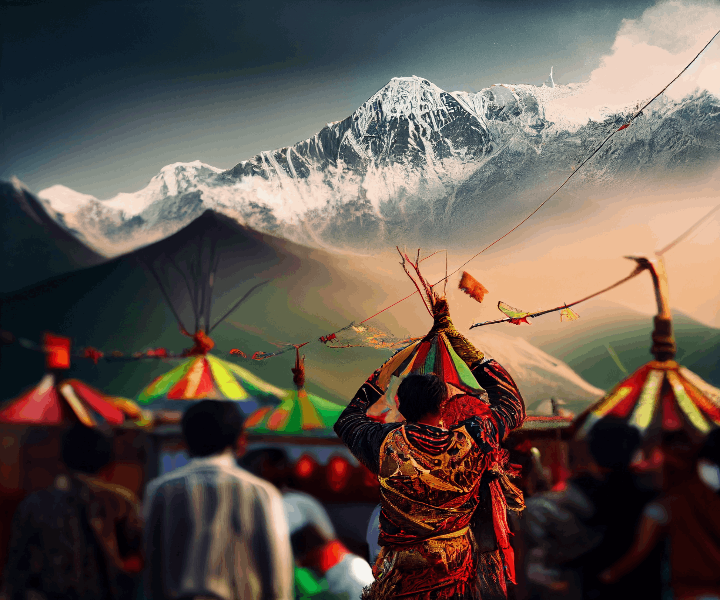

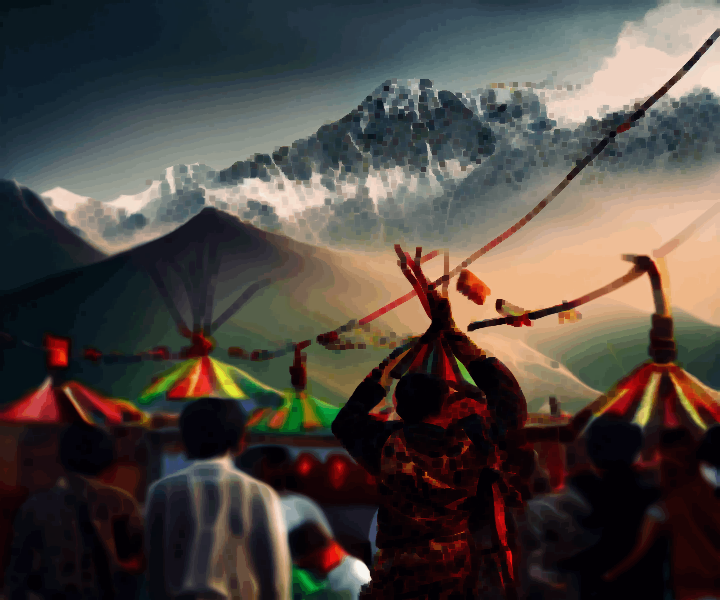

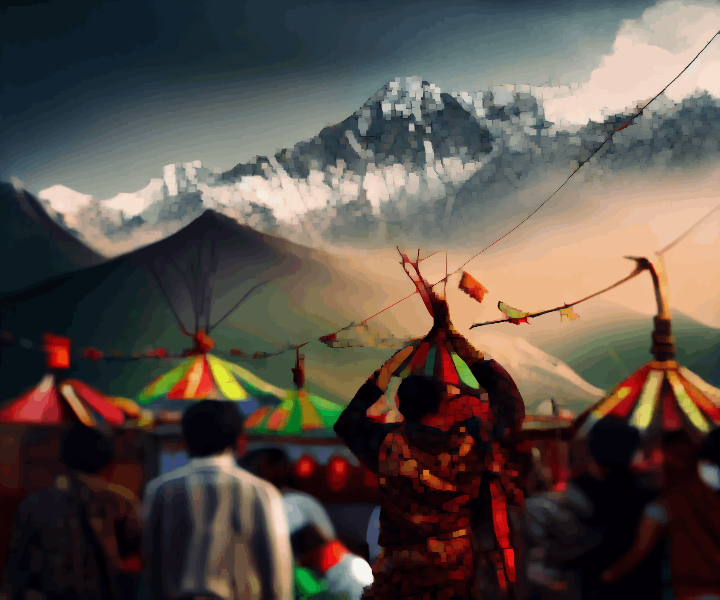

In [58]:
kernel = np.ones((5, 5), np.uint8)
 
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(test_image_resize, kernel, iterations=1)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
 
cv2_imshow(test_image_resize)
cv2_imshow(img_erosion)
cv2_imshow(img_dilation)

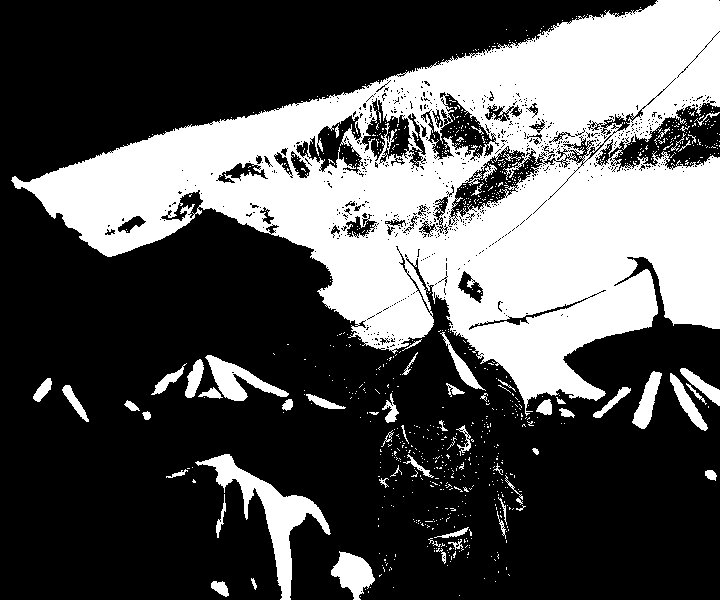

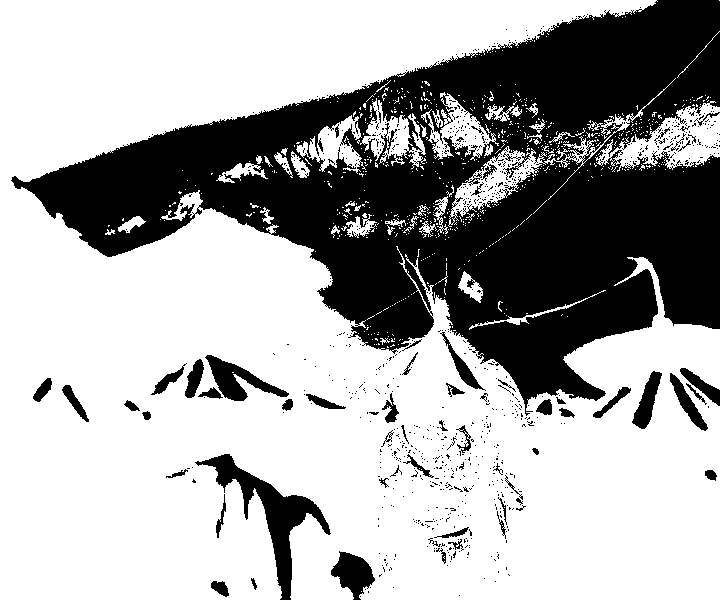

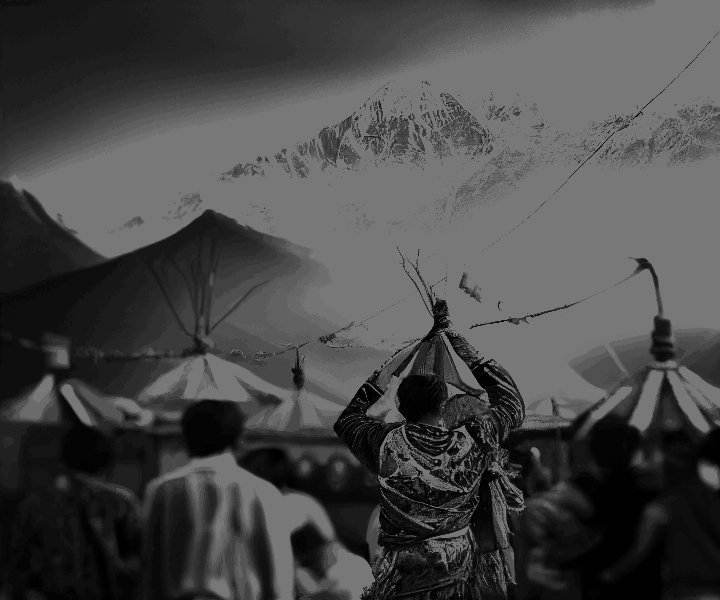

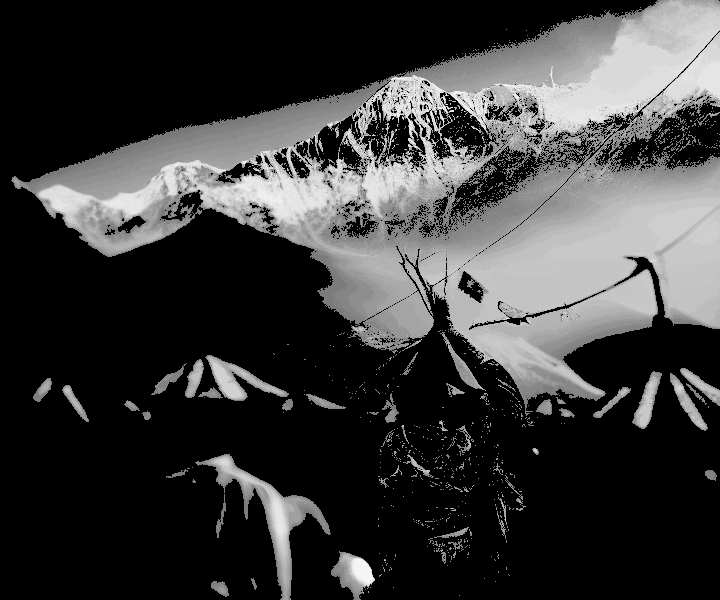

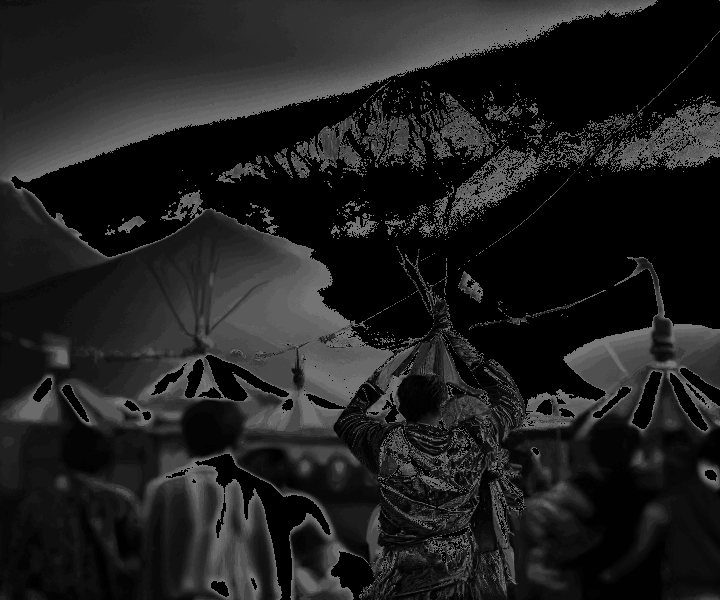

In [ ]:
img = cv2.cvtColor(test_image_resize, cv2.COLOR_BGR2GRAY)
 
# applying different thresholding
# techniques on the input image
# all pixels value above 120 will
# be set to 255
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)
 
# the window showing output images
# with the corresponding thresholding
# techniques applied to the input images
cv2_imshow(thresh1)
cv2_imshow(thresh2)
cv2_imshow(thresh3)
cv2_imshow(thresh4)
cv2_imshow(thresh5)